#  Business Problem Understanding

    Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban, and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.
    company wants to automate the loan eligibility process(real time) based on customer detail provided while filling online application form. These details are Gender Maritial Status, Education ,Number of dependents, income, Loan Amount,Creadit hostory, and others. To automate this process ,they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\subha\Downloads\LoanData.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# lets check column names present in the datast
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

##  Data Undersranding

# 

. Loan_ID : unique Loan ID

. Gender : Male/Female

. Married : Applicant married

. Dependent : Number of dependents

. Education : Applicant Education

. Self_employed : Whether the applicant is self_employed

. Applicant income : Applicant Income

. Coapplicant income : Coapplicant income

. Loan Amount : Loan amount in thousand.

. Loan_Amount_Term : Term of loan amounts

. Creadit History : creadit history meets guidelines

. property area : urban/semi urban/Rural

. Loan_Status : Loan approved target variable


In [5]:
data['Loan_ID'].nunique()

614

In [6]:
data.drop(columns=['Loan_ID'],inplace=True)

In [7]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
data["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
data['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
data['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [18]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [19]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [20]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [22]:
data['Credit_History'] = data['Credit_History'].replace({1:'good', 0:'bad'})

In [23]:
data['Credit_History'].unique()

array(['good', 'bad', nan], dtype=object)

In [24]:
data['Credit_History'].value_counts()

Credit_History
good    475
bad      89
Name: count, dtype: int64

In [25]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [26]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [27]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [28]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [29]:
continous = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

discrete_categorical = ['Gender','Married','Education','Self_Employed',
                       'Credit_History','Property_Area','Loan_Status']

discrete_count = ['Dependents','Loan_Amount_Term']

###  Explaratory Data Analysis(EDA)

#####  for continous variables

In [30]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


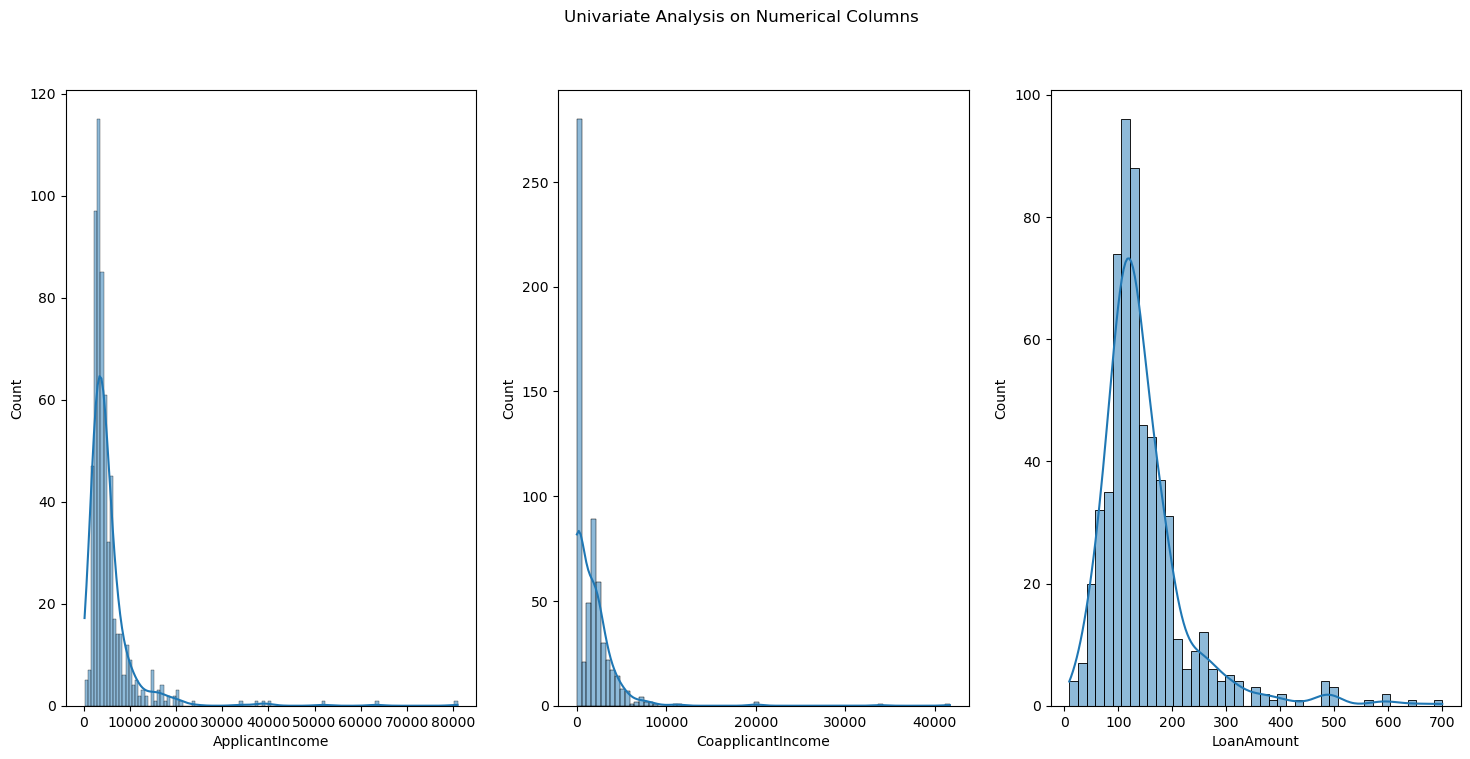

In [31]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'],kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'],kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical Columns')
plt.show()

In [32]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

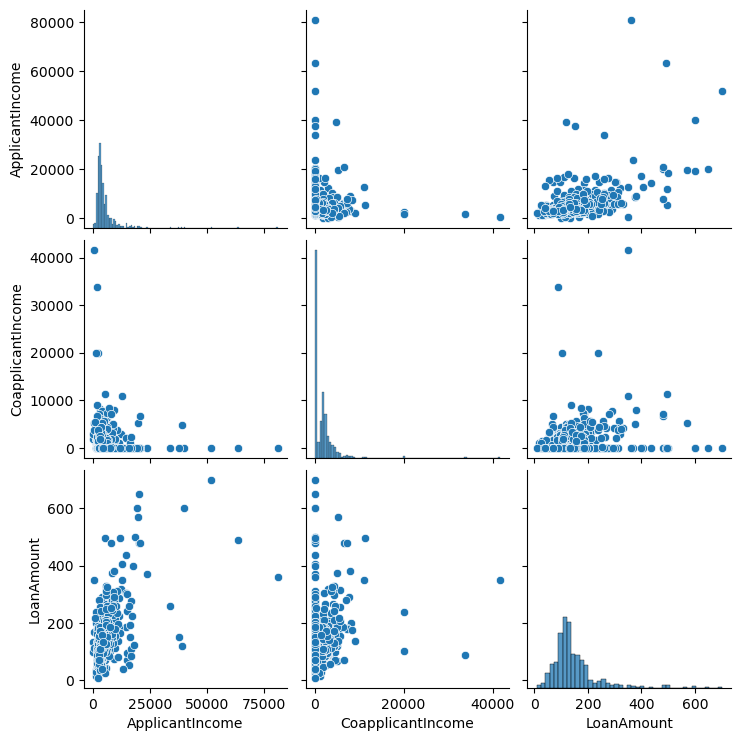

In [33]:
sns.pairplot(data[continous])
plt.show

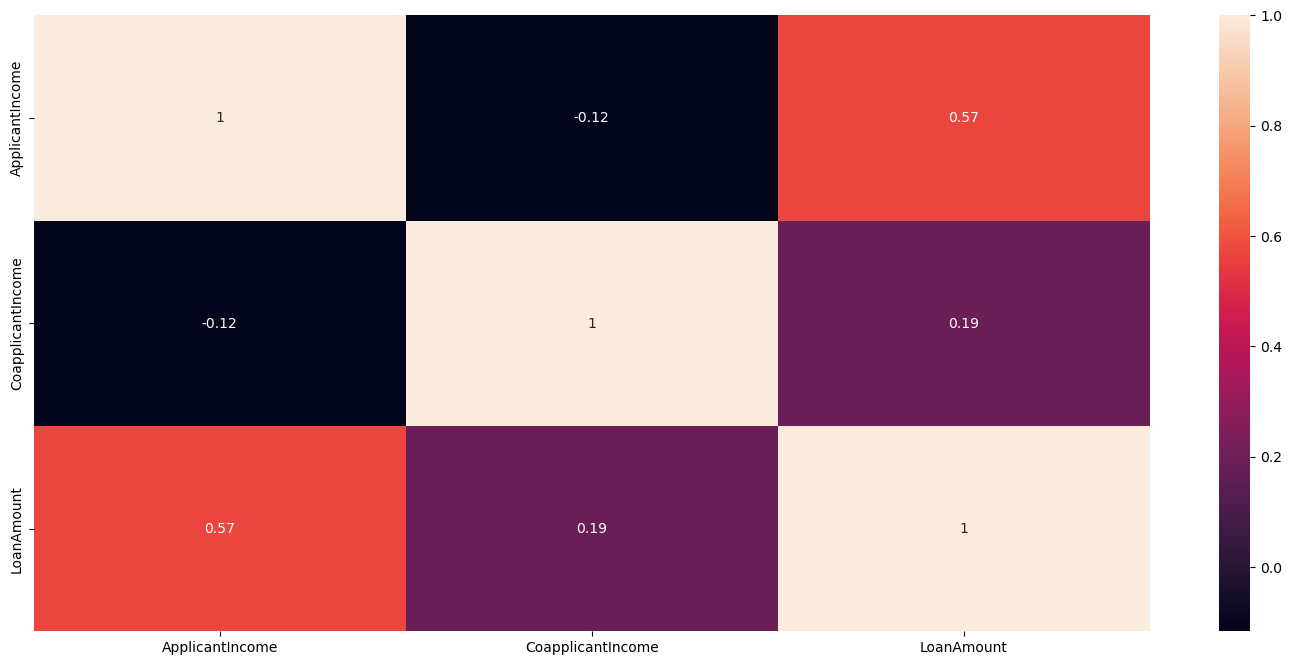

In [34]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

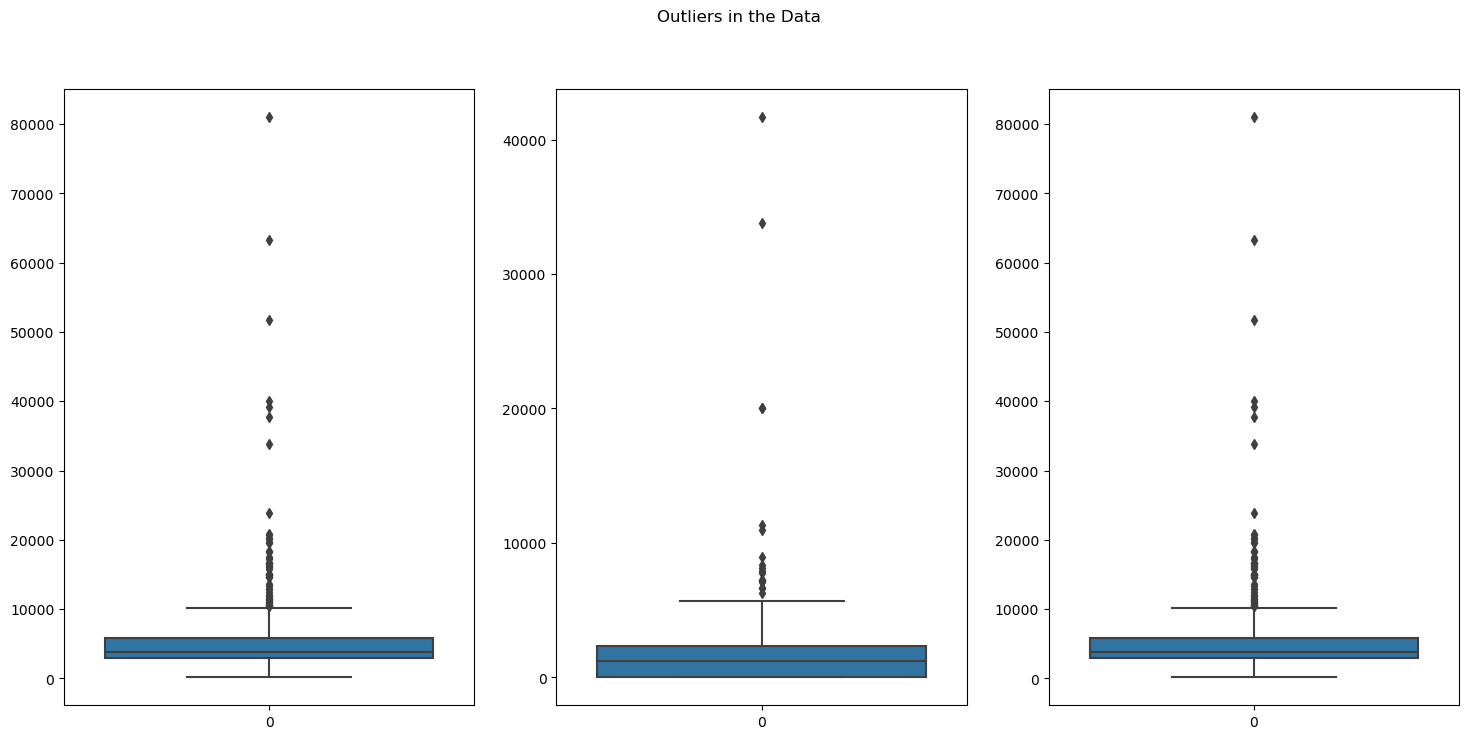

In [35]:
#lets visualize the outliers using Box Plot

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['ApplicantIncome'])

plt.suptitle('Outliers in the Data')
plt.show()

In [36]:
discrete_categorical

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

####  For discrete variables

In [37]:
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,good,Semiurban,Y
freq,489,398,480,500,475,233,422


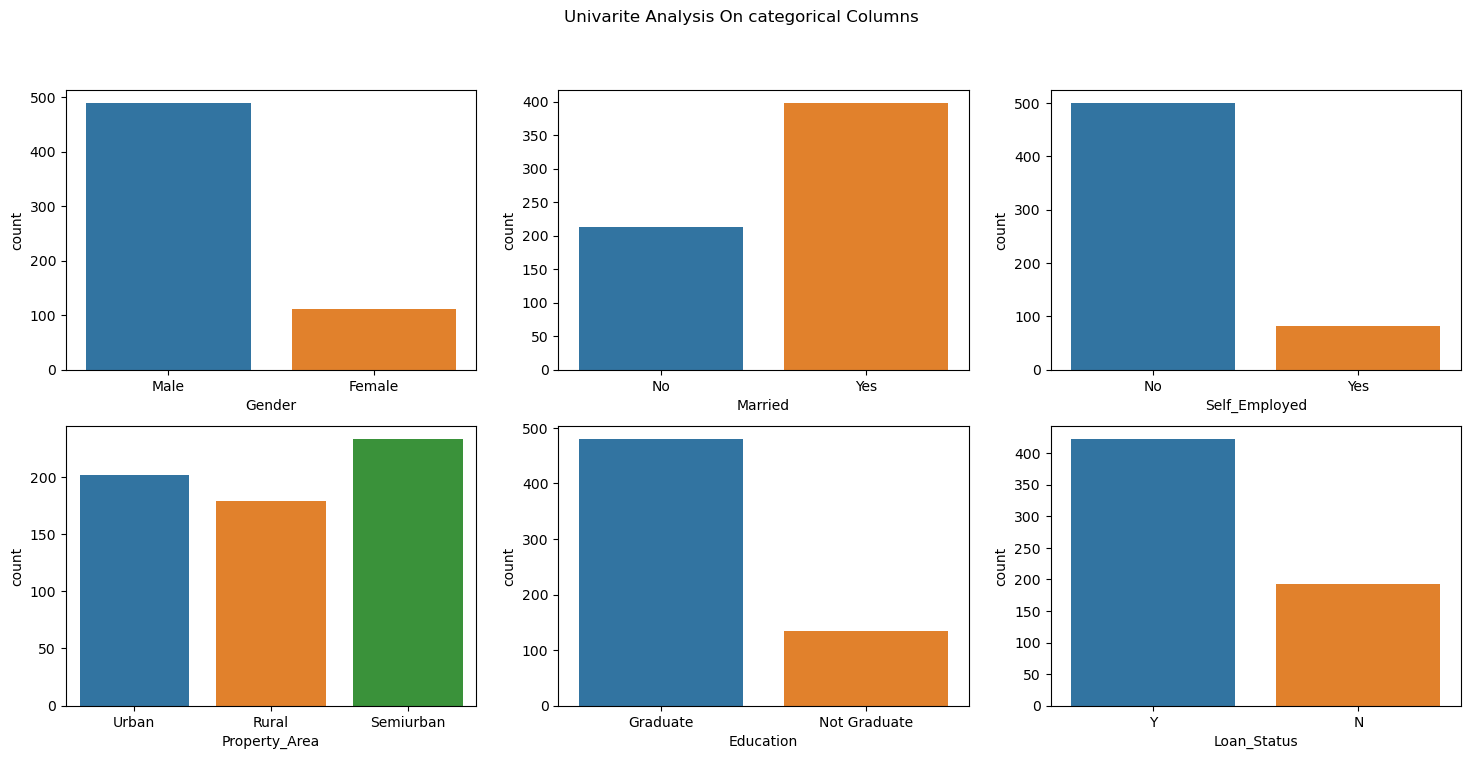

In [38]:
plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(2,3,1)
sns.countplot(x=data['Gender'])

plt.subplot(2,3,2)
sns.countplot(x=data['Married'])

plt.subplot(2,3,3)
sns.countplot(x=data['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(x=data['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(x=data['Education'])

plt.subplot(2,3,6)
sns.countplot(x=data['Loan_Status'])

plt.suptitle('Univarite Analysis On categorical Columns')
plt.show()

#  Data Preparation

In [39]:
data["Income"] = data['ApplicantIncome'] +data['CoapplicantIncome']

data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

### Modifying the wrong data

In [40]:
data['Dependents'] = data['Dependents'].replace({'3+':3})

###  Missing Values Treatment

In [41]:
# checking no. of Missing Values
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [42]:
# Checking Percentage of missing value
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [43]:
data = data.dropna(subset=["Income",'LoanAmount','Loan_Amount_Term','Credit_History'])

In [44]:
# count variable replace with 0
data['Dependents'] = data['Dependents'].fillna(0)

In [45]:
# categorical variables replce with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [46]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

#####  Outliers treatment

#####  Encoding

In [47]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2}).astype('int')
data['Credit_History'] = data['Credit_History'].map({'good':1,'bad':0}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

####  Data type convertion

In [48]:
data['Dependents'] = data['Dependents'].astype('int')
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype('int')

In [49]:
data[["Income",'LoanAmount']].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [50]:
# lets apply boxcox transform to remove skewness
from scipy.stats import boxcox
data['Income'],a = boxcox(data['Income'])
data['LoanAmount'],b = boxcox(data['LoanAmount'])

In [51]:
data[["Income",'LoanAmount']].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [52]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term']/12

#####  x & y

In [53]:
x = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [54]:
Train = []
Test  = []
CV    = []

for i in range(0,101):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    log_default = LogisticRegression()
    log_default.fit(x_train,y_train)
    
    ypred_train = log_default.predict(x_train)
    ypred_test  = log_default.predict(x_test)
    
    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(y_train,ypred_train))
    Test.append(accuracy_score(y_test,ypred_test))
    
    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(log_default,x_train,y_train,cv=5,scoring="accuracy").mean())

em = pd.DataFrame({"Train":Train,"Test":Test,"CV":CV})
gm = em[(abs(em['Train']-em['Test'])<=0.05) & (abs(em['Test']-em['CV'])<=0.05)]
rs = gm[gm["CV"]==gm["CV"].max()].index.to_list()[0]
print("best random_state number:",rs)

best random_state number: 70


####  train_test_split

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=70)

In [56]:
from sklearn.metrics import accuracy_score

##  Mechine Learning Modelling &Evaluation

### 1 :  Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)



LogisticRegression()

In [58]:
ypred_train = log_model.predict(x_train)
ypred_test = log_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy"))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      

Train Accuracy : 0.8226950354609929
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7830188679245284


### 2 : KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_model = knn_grid.best_estimator_


ypred_train = knn_model.predict(x_train)
ypred_test = knn_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(knn_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      


Train Accuracy : 0.7541371158392435
Cross Validation Score : [0.72941176 0.74117647 0.74117647 0.73809524 0.73809524]
Test Accuracy : 0.7075471698113207


# 3 :   Support Vector Machine(SVM)

In [60]:
from sklearn.svm import SVC

estimator = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}

from sklearn.model_selection import GridSearchCV
svm_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
svm_grid.fit(x_train,y_train)

svm_model = svm_grid.best_estimator_


ypred_train = svm_model.predict(x_train)
ypred_test = svm_model.predict(x_test)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      


Train Accuracy : 0.8226950354609929
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7830188679245284


###  4 : Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state=rs)
param_grid = {"criterion":["gini","entropy"],
             "max_depth":list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
dt_grid.fit(x_train,y_train)

# identify the best model
dt = dt_grid.best_estimator_

# identify the importance of each feature
dt_fi = dt.feature_importances_

# identify the features where the feature importance is greater than 0
index = [i for i,x in enumerate(dt_fi)if x>0]

# create new dataset with important features
x_train_dt = x_train.iloc[:,index]
x_test_dt = x_test.iloc[:,index]

# train with best model and important features
dt.fit(x_train_dt,y_train)

ypred_train = dt.predict(x_train_dt)
ypred_test = dt.predict(x_test_dt)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      


Train Accuracy : 0.8226950354609929
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7830188679245284


In [62]:
x_train_dt

,Credit_History
158,1
119,1
448,0
519,1
391,1
...,...
70,1
370,1
140,1
252,1


In [63]:
 dt_grid.best_estimator_


DecisionTreeClassifier(max_depth=1, random_state=70)

In [64]:
dt.feature_importances_

array([1.])

###  5 : Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(x_train,y_train)

rf = rf_grid.best_estimator_
rf_fi = rf.feature_importances_

index = [i for i,x in enumerate(rf_fi)if x>0]

x_train_rf = x_train.iloc[:,index]
x_test_rf = x_test.iloc[:,index]

# train with best model and important features
rf.fit(x_train_rf,y_train)

ypred_train = rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      


Train Accuracy : 0.9905437352245863
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7641509433962265


###  6 : AdaBoost Classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=rs)
param_grid = {'n_estimators':list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)

ab = ab_grid.best_estimator_
ab_fi = ab.feature_importances_

index =[i for i, x in enumerate(ab_fi) if x>0]

x_train_ab = x_train.iloc[:,index]
x_test_ab = x_test.iloc[:,index]

# train with best model and important features
ab.fit(x_train_ab,y_train)

ypred_train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))      
 

Train Accuracy : 0.83451536643026
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7641509433962265


###  7 : Gradient Boost Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier(random_state=rs)
param_grid = {"n_estimators":list(range(1,10)),"learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)

gb = gb_grid.best_estimator_
gb_fi = gb.feature_importances_

index =[i for i, x in enumerate(gb_fi) if x>0]

x_train_gb = x_train.iloc[:,index]
x_test_gb = x_test.iloc[:,index]

# train with best model and important features
gb.fit(x_train_gb,y_train)

ypred_train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8392434988179669
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7735849056603774


In [68]:
from xgboost import XGBClassifier
estimator = XGBClassifier(random_state=rs)
param_grid = {"n_estimators":[10,20,40,100],"max_depth":[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
xgb_grid.fit(x_train,y_train)

xgb = xgb_grid.best_estimator_
xgb_fi = xgb.feature_importances_

index =[i for i, x in enumerate(xgb_fi) if x>0]

x_train_xgb = x_train.iloc[:,index]
x_test_xgb = x_test.iloc[:,index]

# train with best model and important features
xgb.fit(x_train_xgb,y_train)

ypred_train = xgb.predict(x_train_xgb)
ypred_test = xgb.predict(x_test_xgb)

# Evaluate the best model
print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("Cross Validation Score :",cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy'))
print("Test Accuracy :",accuracy_score(y_test,ypred_test))

Train Accuracy : 0.8557919621749409
Cross Validation Score : [0.82352941 0.8        0.81176471 0.83333333 0.8452381 ]
Test Accuracy : 0.7735849056603774
